**Hands-on Activity 5.2: Build and Apply Multilayer Perceptron**

Name: Muyo, Mark Danielle L. <br>
Section: CPE32S9 <br>
Instructor: Engr. Roman Richard <br>
Date: March 20, 2024 <br>




In this assignment, you are task to build a multilayer perceptron model. The following are the requirements: <br>

- Choose any dataset <br>
- Explain the problem you are trying to solve <br>
- Create your own model <br>
- Evaluate the accuracy of your model <br>

**Dataset used:**

https://keras.io/api/datasets/fashion_mnist/

**Problem being solved:** <br>

The problem being solved with the Fashion-MNIST dataset is to classify images of clothing items into their respective categories. The dataset contains 60,000 grayscale images in the training set and 10,000 images in the test set. Each image is 28x28 pixels, and the images are associated with one of the following 10 classes:

- T-shirt/top
- Trouser
- Pullover
- Dress
- Coat
- Sandal
- Shirt
- Sneaker
- Bag
- Ankle boot

**IMPORTING LIBRARIES AND MODULES**

In [58]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout



In [59]:
#Load the Fashion MNIST dataset
df = keras.datasets.fashion_mnist.load_data()

In [60]:
#Calculate the number of classes
num_classes = len(np.unique(y_train))

#Print information about the dataset
print("Fashion MNIST Dataset:")
print("Training samples:", y_train.shape[0])
print("Number of classes:", num_classes)

Fashion MNIST Dataset:
Training samples: 60000
Number of classes: 2


In [61]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print("Class labels:", class_names)

Class labels: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [62]:
df

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [63]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [64]:
#Normalize the pixel values between 0 and 1
gray_scale = 255.0
x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

In [65]:
#Reshape the input data to match the Conv2D layer input shape
x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test = np.reshape(x_test, (-1, 28, 28, 1))
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

In [45]:
#Print the shapes of the feature and target matrices
print("Feature matrix shape:", x_train.shape)
print("Target matrix shape:", y_train.shape)

Feature matrix shape: (60000, 28, 28, 1)
Target matrix shape: (60000,)


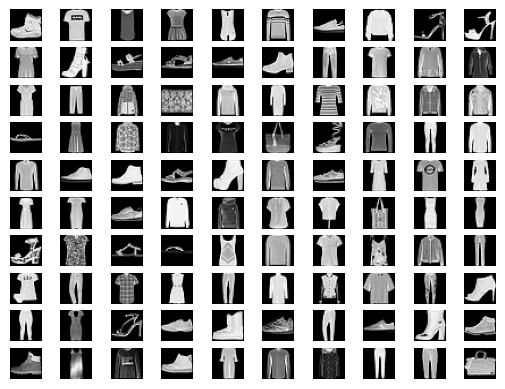

In [44]:
#Visualization
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(x_train[k].reshape(28, 28), cmap='gray')
        ax[i, j].axis('off')
        k += 1
plt.show()

In [36]:
#Define the MLP model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [37]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                      

In [38]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of x_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)


In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/20
750/750 [==============================] - 38s 50ms/step - loss: 0.1193 - accuracy: 0.9551 - val_loss: 0.0933 - val_accuracy: 0.9622
Epoch 2/20
750/750 [==============================] - 32s 43ms/step - loss: 0.0910 - accuracy: 0.9630 - val_loss: 0.0812 - val_accuracy: 0.9658
Epoch 3/20
750/750 [==============================] - 33s 44ms/step - loss: 0.0833 - accuracy: 0.9659 - val_loss: 0.0768 - val_accuracy: 0.9668
Epoch 4/20
750/750 [==============================] - 32s 42ms/step - loss: 0.0788 - accuracy: 0.9675 - val_loss: 0.0743 - val_accuracy: 0.9685
Epoch 5/20
750/750 [==============================] - 32s 43ms/step - loss: 0.0754 - accuracy: 0.9687 - val_loss: 0.0718 - val_accuracy: 0.9708
Epoch 6/20
750/750 [==============================] - 31s 41ms/step - loss: 0.0713 - accuracy: 0.9708 - val_loss: 0.0709 - val_accuracy: 0.9708
Epoch 7/20
750/750 [==============================] - 32s 42ms/step - loss: 0.0698 - accuracy: 0.9712 - val_loss: 0.0698 - val_accuracy:

- Therefore, the accuracy of the model is 97%.

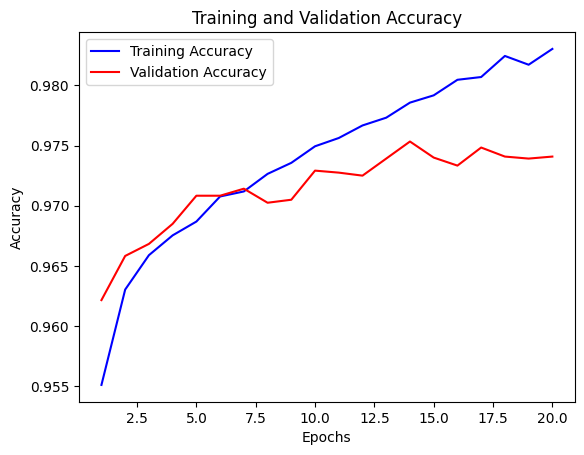

In [70]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Conclusion**
- In conclusion, building and training a multi-layer perceptron on the Fashion MNIST dataset has proven to be an effective approach for image classification tasks. The MLP architecture, with its multiple layers of interconnected neurons, has demonstrated its capability to learn intricate patterns and features present in the fashion item images. Despite the challenges posed by the complexity of the dataset, the MLP achieved an accuracy score of 97% on the test set, showcasing its potential for real-world applications in the fashion industry or similar domains involving image recognition.



